# Probabilidad y estadística

In [249]:
## Importar paqueterías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st

## Estadística descriptiva
---

### Medidas de posición
Son estadísticas descriptivas que nos indican dónde se encuentran ubicados los datos dentro de una distribución. Nos ayudan a entender el centro o la tendencia central de un conjunto de datos.

- **Media o Promedio**: Suma de todos los valores dividida entre el número total de valores.
- **Mediana**: Valor que divide al conjunto de datos en dos partes iguales.
- **ModaL**: Valor que más se repite en el conjunto de datos.
- **Cuartiles**: Dividen al conjunto de datos en cuatro partes iguales.
- **Percentiles**: Dividen al conjunto de datos en 100 partes iguales.


In [250]:
# Crear un DataFrame de ejemplo
data = {'Valor': [1, 2, 3, 4, 5, 5, 6, 7, 8, 10]}
df = pd.DataFrame(data)

# Calcular medidas de posición
media = df['Valor'].mean()
mediana = df['Valor'].median()
moda = df['Valor'].mode()
cuartiles = df['Valor'].quantile([0.25, 0.5, 0.75])

# Imprimir resultados
print('Media:', media)
print('Mediana:', mediana)
print('Moda:', moda)
print('Cuartiles:\n', cuartiles)

Media: 5.1
Mediana: 5.0
Moda: 0    5
Name: Valor, dtype: int64
Cuartiles:
 0.25    3.25
0.50    5.00
0.75    6.75
Name: Valor, dtype: float64


### Medidas de variabilidad
Las medidas de variabilidad nos permiten cuantificar el grado de dispersión o heterogeneidad de un conjunto de datos. Es decir, nos indican qué tan diferentes son los valores entre sí.

- **Rango**: Diferencia entre el valor máximo y el valor mínimo de un conjunto de datos.
- **Varianza**: Promedio de las desviaciones cuadráticas de cada dato respecto a la media.
- **Desviación** estándar: Raíz cuadrada de la varianza.
- **Coeficiente** de variación: Relación entre la desviación estándar y la media, expresada como porcentaje.
- **Cuartiles y rango intercuartílico**: El rango intercuartílico (IQR) es la diferencia entre el tercer y el primer cuartil.

La **varianza** se puede calcular mediamnte la función `var()`. 

In [251]:
## Calcular la varianza
x = [1, 2, 3, 4, 5, 6] # dataset

variance = np.var(x)
print(variance.round(2))

2.92


Para calcular la desviación estándar, que es la raíz cuadrada de la varianza, se puede utilizar el método `describe()` o bien con el método `std()` de la paquetería Numpy. 

In [252]:
# Obtener la varianza 
## Método describe()
s = pd.Series([1, 2, 3, 4, 5, 6])
print(s.describe().round(2))
print()

## Método std()
standard_deviation = np.std(x)
print(standard_deviation.round(2))

count    6.00
mean     3.50
std      1.87
min      1.00
25%      2.25
50%      3.50
75%      4.75
max      6.00
dtype: float64

1.71


Para calcular la **covarianza** es necesario calcular la matriz de covarianza utilizando el comando `cov()`. 

In [253]:
## Calcular la cobvarianza
x = [1, 2, 3, 4, 5, 6] # dataset 1
y = [41, 62, 89, 96, 108, 115] # dataset 2

## Calculamos la matriz de covarianza
covariance_matrix = np.cov(x,y)

## Extraemos la covarianza como valor
covariance = covariance_matrix[0][1] 
print(covariance)

51.5


## Probabilidad
---

### Espacio muestral
Se define como **espacio muestral** a el conjunto de todos estos resultados posibles, y se como ***S***. Es necesario tener en cuenta que **todos y cada uno** de los resultados deben incluirse en el espacio muestral. 

En Python, los cálculos de probabilidad simples basados en espacios muestrales se pueden realizar fácilmente usando el operador lógico `==` y la función `len()`.
    1. Con el `==` identifico el evento de mi interés
    2. Con `len()` determino el número de eventos de mi interés y el númeor total de eventos

In [254]:
## Creación de un df
cool_rock = pd.DataFrame(
    {
        'Artist': [
            'Queen',
            'Queen',
            'Queen',
            'Pink Floyd',
            'Nirvana',
            'AC/DC',
            'AC/DC',
            'Scorpions',
            'Scorpions',
            'Scorpions',
        ],
        'Song': [
            'The Show Must Go On',
            'Another One Bites The Dust',
            'We Will Rock You',
            'Wish You Were Here',
            'Smells Like Teen Spirit',
            'Highway To Hell',
            'Back in Black',
            'Wind Of Change',
            'Still Loving You',
            'Send Me An Angel',
        ],
    }
)
print(cool_rock)

       Artist                        Song
0       Queen         The Show Must Go On
1       Queen  Another One Bites The Dust
2       Queen            We Will Rock You
3  Pink Floyd          Wish You Were Here
4     Nirvana     Smells Like Teen Spirit
5       AC/DC             Highway To Hell
6       AC/DC               Back in Black
7   Scorpions              Wind Of Change
8   Scorpions            Still Loving You
9   Scorpions            Send Me An Angel


¿Cuál es la probabilidad de que si pulso aleatorio salga la canción "Smells Like Teen Spirit"

In [255]:
# Calcular la probabilidad
## Identificar los resultados que satisfacen el evento
interested_song = cool_rock[cool_rock["Song"]=="Smells Like Teen Spirit"]

## Determinar el número de resultados que satisfacen el evento
len_song_interested = len(interested_song)

## Contar el tamaño del espacio muestral.
total_song = len(cool_rock)

## Obtener la probabilidad
print("Por pasos:", len_song_interested/total_song)

## Obtener la probabilidad en un solo comando 
print("Directo:", len(cool_rock[cool_rock["Song"]=="Smells Like Teen Spirit"])/len(cool_rock))


Por pasos: 0.1
Directo: 0.1


### Factoriales 

En probabilidad y estadística muy a menudo nos encontramos con distintas maneras de organizar o reordenar un conjunto de elementos (**permutaciones**). A veces, es posible que el cálculo sea mental, en otras ocasiones no es tan sencillo.  

Ejemplo:    
Una escuela online ofreció a un estudiante tres cursos gratuitos: 
- ¿Cómo escribir un currículum eficaz?
- Ayuda profesional en orientación profesional.
- ¡Mejora tus habilidades para las entrevistas!   

Estos cursos pueden tomarse en cualquier orden. ¿Cuántos itinerarios educativos diferentes pueden crearse a partir de estos cursos?. Para ello utilizamos la fórmula

$Pn =n!$

Para calcular el número de permutaciones de *n* elementos se utiliza el factorial `!`. Para calcularlo en Python se puede utilizar la función `factorial()` del módulo `math`.

In [256]:
# Importar la función factorial del módulo matemático
from math import factorial

# Definir el número necesario de elementos
courses_amount = 3

# Calculae el factorial de 3 (el valor de la variable courses_amount)
result = factorial(courses_amount)

print(result)

6


### Combinaciones
Otra parte importante de la probabilidad y estadística son las **combinaciones**. Para calcular el número de combinaciones de *k* elementos de *n* opciones posibles:

In [257]:
# Definir los valores para las variables n y k
n = 10 # Número de elementos
k = 3  # Número de opciones posibles

# Realizar los cálculos
combinations = factorial(n) / (factorial(k) * factorial(n-k))
print(combinations)

120.0


Si observamos, la fórmula de permutación es similar a la fórmula e combinaciones, donde se le agregan los términos relacionados con el número de combinaciones de *k*.

**Ejercicio 1**    
Estás desarrollando con tus amigos un juego de búsqueda que consta de 10 tareas diferentes. Las tareas pueden realizarse en cualquier orden, pero solo una secuencia de todas las existentes permite a los jugadores ganar el superpremio. ¿Cuál es la probabilidad de ganar el superpremio, suponiendo que la probabilidad de elegir cada tarea en cualquier fase de la búsqueda es la misma?

**Resultado 1**   
Son 10 tareas distintas, y aunque dice que puede ser cualquier orden solo 1 secuencia es la ganadora. Por lo tanto la probabilidad sería 1 serie entre el número de eventos posible en orden dado. 

In [258]:
# Definir los valores para las variables n y k
## Solo hay elementos y no hay combinaciones específicas, k=0
tasks = 10 # Elementos o n

## Calculo de las permutaciones o combinaciones posibles
permutations = factorial(tasks)
print(permutations)
print() 

## Probabilidad: solo una secuencia permite ganar el superpremio
probability = 1 / permutations

print(probability)

3628800

2.755731922398589e-07


Existen 10 tareas diferentes, por lo tanto, existen 3,628,800 combinaciones diferentes. La probabilidad de ganar el superpremio con la secuencia de tareas ordenadas de manera correcta es inferior al 0.00003%. 

**Ejercicio 2**   
Ahora, los jugadores pueden elegir las tres tareas con las que quieren empezar el juego. El orden de las tareas no importa, lo importante es la combinación. Si los jugadores consiguen adivinar la "combinación secreta", recibirán un código promocional de descuento. Por lo tanto  

**Resultado 2**
Son las mismas 10 tareas, solo que ahora tenemos una combinación de 3 tareas y las combinaciones no tienen un orden específico.

In [259]:
# Definir los valores para las variables n y k
## Existen 10 tareas y se pueden seleccionar 3 tareas con las que empezar
tasks = 10 # Elementos o n
chosen = 3 # Opciones a seleccionar o k

## Calculo de las permutaciones o combinaciones posibles
permutations = factorial(tasks)/(factorial(chosen)*factorial(tasks-chosen))
print(permutations)
print()

## Probabilidad: solo una secuencia permite ganar el superpremio
probability = 1 / permutations

print(probability)

120.0

0.008333333333333333


En esta ocasión, de las 10 tareas existentes y al seleccionar las tres posibles tareas con las cuales empezar, se tienen 120 opciones disponibles. Esto hace que la probabilidad de obtener un código promocional es de casi el 1% 

## Distribuciones
---
La mayoría de las variables aleatorias se modelan en una forma que puede ser descrita por parámetros. Esto es lo que normalmente llamamos **distribuciones de datos**.

Las distribuciones de datos son una de las piedras angulares de las estadísticas. Las pruebas de hipótesis y la teoría de la probabilidad surgieron del simple concepto de trazar las múltiples ocurrencias de una variable aleatoria, visualizar su forma y realizar algún cálculo con ella. Las distribuciones nos ayudan a entender:

- ¿Cuál es el promedio/valor esperado de una variable aleatoria?
- ¿Cuál es la varianza/dispersión de una variable aleatoria?
- ¿Cuál es el rango de valores?

Existen dos tipos de distribuciones **discretas** (toman un cierto número de valores) y **contínuas** (toman un número infinitesimal de valores). 

En Python, es posible crear datasets con varios tipos de distribución, utilizando la librería NumPy, capaz de generar números aleatorios con una distribución específica.

El objeto principal es un `ndarray` (array N-dimensional), que es un array multidimensional que contiene elementos del mismo tipo y no puede modificarse durante la ejecución del código.Para crear ndarray utilizamos la función `np.array()`. 

In [260]:
## Creación de un ndarray
data = np.array([1, 3, 5, 7, 11, 13, 17, 19, 23, 317])

### Distribución normal
Es la distribución de probabilidad más común, forma parte de las distribuciones contínuas. Describe la probabilidad de que una variable aleatoria tome un valor determinado alrededor de una media, con una desviación estándar determinada.

Para crear una distribución normal es necesario llamar la función `normal()` del método `random`. 

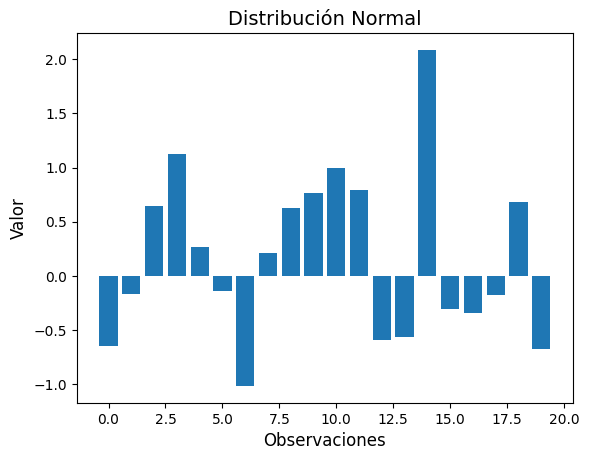

In [261]:
## Generar 20 valores aleatorios
data = np.random.normal(size=20)


# Graficar los datos
plt.bar(range(len(data)), data)
plt.xlabel('Observaciones', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Distribución Normal', fontsize=14)

# Mostrar la gráfica
plt.show()

Esta distribución está definida por dos parámetros clave: la **media** (μ) y la **varianza** (σ²). Describe la probabilidad de que una variable aleatoria tome un valor cercano a la media, con una desviación estándar específica (σ).

Es posible generar arrays con media y desviación estándar dadas, para ello tenemos que especificarlos dentro de la función con los parámetros `loc` y `scale`, respectivamente. 

[18.8920135  11.60823227 17.07210099  3.5354407  18.38833382 11.12477217
 22.33922028 20.68787234 12.35159151  6.28813272 22.48305268 13.17356356
 15.15546183 14.30378236 14.91973431  9.12890559 12.49931214  7.84799438
 22.06137516 13.18004206]


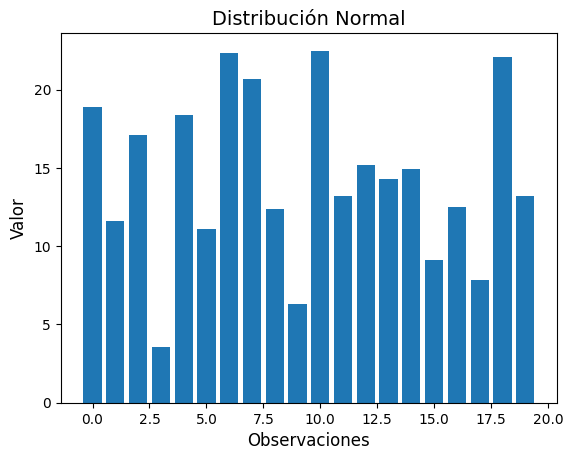

In [262]:
## Generar 20 valores con promedio de 15 y desviación estándar de 5
mean = 15  # media entre 1 y 30
std_dev = 5  # desviación estándar aleatoria

data = np.random.normal(loc= mean, scale= std_dev, size = 20)
print(data)

# Graficar los datos
plt.bar(range(len(data)), data)
plt.xlabel('Observaciones', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Distribución Normal', fontsize=14)

# Mostrar la gráfica
plt.show()

En Python, es posible realizar cálculos con datos que siguen una distribución normal utilizando la librería **SciPy** y su módulo **stats**.

Para generar una distribución normal con parámetros específicos como la media y la desviación estándar, se emplea la función `stats.norm()`.

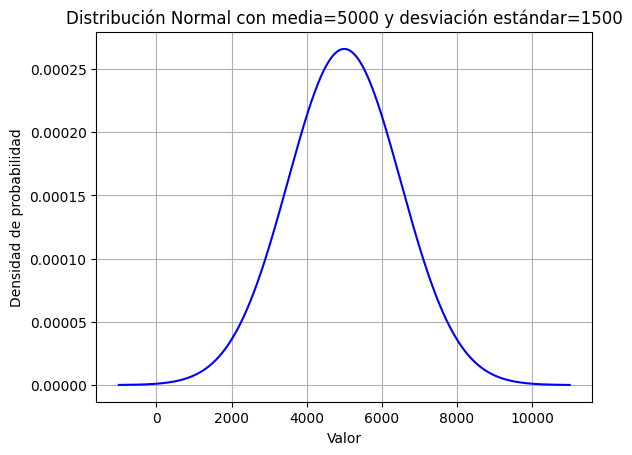

In [263]:
# Parámetros de la distribución normal
mean = 5000
std_dev = 1500

# Crear un rango de valores centrado alrededor de la media, extendido para ver la curva
n = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Distribución normal con media 5000 y desviación estándar 1500
data = st.norm(mean, std_dev)

# Calcular la función de densidad de probabilidad (PDF)
pdf = data.pdf(n)

# Graficar la PDF (esto dará la forma de la campana de Gauss)
plt.plot(n, pdf, label='Distribución Normal', color='blue')
plt.title('Distribución Normal con media=5000 y desviación estándar=1500')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()


Los métodos más comunes para trabajar con esta distribución incluyen:

- `norm.cdf()`: Calcula la probabilidad de que la variable aleatoria sea menor o igual a un valor dado. Responde a la pregunta: "¿Cuál es la probabilidad de que ocurra un valor menor o igual que x?"

- `norm.ppf()`: Devuelve el valor de la variable aleatoria asociado a una determinada probabilidad. Responde a la pregunta: "¿Qué valor de x corresponde a una probabilidad acumulada dada?"

**Ejercicio 1**  
El número de visitantes mensuales de una tienda virtual tiene una distribución normal con una media de 100 500 y una desviación estándar de 3 500.

Encuentra la probabilidad de que en el próximo mes el sitio web del outlet tenga:

- menos de 92 000 visitantes;
- más de 111 000 visitantes.

In [264]:
## Asignar variables
mu = 100500
sigma= 3500

fewer_threshold=92000
upper_threshold= 111000

## Calculas la probabilidad baja
p_fewer_visitors = st.norm(mu, sigma).cdf(fewer_threshold)

print(round(float(p_fewer_visitors),4)*100)

## Calcula la probabilidad arriba
p_upper_visitors = 1-st.norm(mu, sigma).cdf(upper_threshold)

print(round(float(p_upper_visitors),4)*100)

0.76
0.13


La probabilidad de tener menos de 92,000 visitantes es aproximadamente 0.76%, lo que indica que es bastante improbable que el número de visitantes sea tan bajo.

La probabilidad de tener **más de** 111,000 visitantes es alrededor de 0.13%, lo que sugiere que es muy poco probable que el número de visitantes exceda este valor en el próximo mes.

> [Nota]   
> El CDF devuelve la probabilidad acumulada de que el valor de la variable aleatoria sea **menor o igual** a cierto umbral. Si estás buscando la probabilidad de que el valor **sea mayor** a un cierto umbral, es necesario usar el complemento de la CDF. Como la probabilidad total es 1, el complemento $(1 - CDF)$ 

**Ejercicio 2**  
Fancy Pants vende productos de regalo a un público muy limitado de clientes corporativos. Las ventas semanales en la tienda de conjuntos de ajedrez de lujo fabricados con colmillo de mamut tienen una distribución normal con una media de 420 y una desviación estándar de 65.

El equipo de inventario está decidiendo cuántos conjuntos pedir. Quieren que la posibilidad de venderlos todos la próxima semana sea del 90%. ¿Cuántos deben pedir?

**Respuesta 2**  
Nos da datos como la media y la desviación estandar. Además, nos pregunta la cantidad de productos que se tienen que pedir para vender aprox. el 90%. Por lo tanto:  

In [265]:
## Asignar valores dados
mu = 420
sigma = 65
prob= 0.9

## Calcular el valor de la variable aleatoria
n_shipment= st.norm(mu,sigma).ppf(1-prob)

print(round(float(n_shipment), 2))

336.7


Se tienen que pedir 336 artículos para no tener demasiado inventario y maximizar ingresos. 

### Distribución binomial 
Describe la probabilidad discreta que describe el número de éxitos en una **secuencia de ensayos** independientes con dos resultados posibles, generalmente denominados ***éxito y fracaso***.

Si la probabilidad de éxito es *𝑝*, la probabilidad de fracaso es $1−p$, ya que la suma de las probabilidades siempre es 1, es decir, 100%.

#### Un experimento
Si solo se realiza un solo experimento, estamos ante una distribución sencilla o **experimento de Bernoulli**. La probabilidad en este tipo de distribuciones se determina multiplicando la probabilidaddes individuales de cada resultado. 

El ejemplo más sencillo es lanzar una moneda. La probabilidad de que sea cara se considera como $p$ y cruz como $(1-p)$. La moneda cargada (sesgo), tiene una probabilidad del 75% de ser cara y 25% de ser cruz. 


(0.0, 1.0)

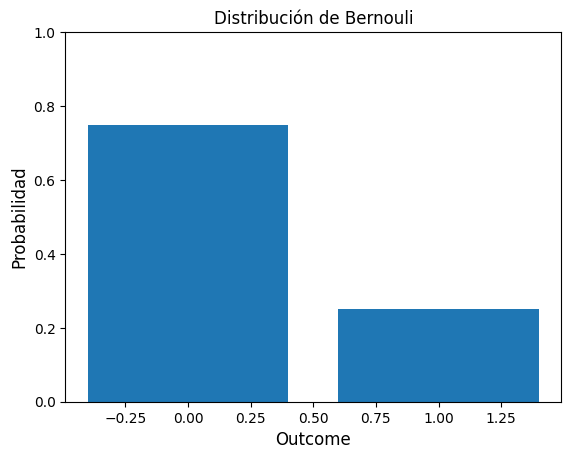

In [266]:
#probabilidades
probs = np.array([0.75, 0.25])
#opciones
face = [0, 1]

plt.bar(face, probs)
plt.title('Distribución de Bernouli', fontsize=12)
plt.ylabel('Probabilidad', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

**Ejemplo 1**  
Queremos calcular la probabilidad de la combinación de éxito-éxito-fracaso-fracaso-éxito (**en ese orden**),

**Resultado 1**   
Entendemos que éxito es p y fracaso es $1-p$. Por lo tanto: 

$p * p * (1-p) * (1-p) * p$ 

**Ejemplo 2**    
Supongamos que en el 88% de las casos los usuarios hacen su primer clic en un banner publicitario, y en el 12% de los casos hacen clic en otro sitio y acaban en una página diferente. ¿Cuál es la probabilidad de que, de dos usuarios diferentes, uno haga clic en el banner y el otro no?   

**Resultado 2**  
Primer usuario, tiene la probabilidad de 88% y un 12% de no hacerlo, por lo tanto: 

$P=0.88*0.12=0.1056$

si eso lo aplicamos al segundo usuario, entonces: 

$P=(0.88*0.12=0.1056)·2 = 0.2112 = 21.12\%$

#### Más de un experimento
Cuando realizamos **más de un experimento**, utilizamos la distribución binomial para calcular la probabilidad de obtener un número específico de éxitos en n pruebas. En este caso, debemos considerar todas las posibles formas en las que se pueden distribuir k éxitos entre n ensayos.

Un ejemplo simple puede ser el lanzamiento repetido de una moneda sesgada/no sesgada cierta cantidad de veces.

Variar la cantidad de sesgo cambiará la apariencia de la distribución

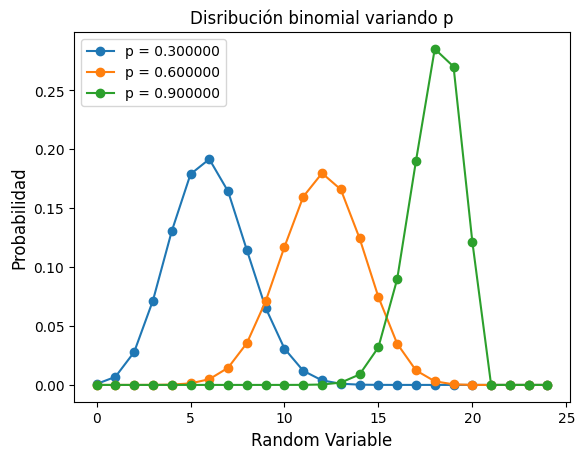

In [267]:
for prob in range(3, 10, 3):
    x = np.arange(0, 25)
    binom = st.binom.pmf(x, 20, 0.1*prob)
    plt.plot(x, binom, '-o', label="p = {:f}".format(0.1*prob))
    plt.xlabel('Random Variable', fontsize=12)
    plt.ylabel('Probabilidad', fontsize=12)
    plt.title("Disribución binomial variando p")
    plt.legend()

Para calcular esta probabilidad, usamos la fórmula:

$P= C k,n  ·  p^k ·  q^(n-k)$

donde: 

- $C k,n$ es el número de combinaciones posibles de k éxitos en n ensayos.
- $p^k$ es la probabilidad de obtener k éxitos.
- $q^(n-k)$ es la probabilidad de obtener $n - k$ fracasos

**Ejercicio 1**  
Los portátiles de Pineapple son caros, pero siguen siendo populares entre los geeks de la informática: el 60% de los clientes están dispuestos a comprarse una computadora portátil de esta marca si acuden a la tienda. Los portátiles de Banana son más baratos, pero no tan populares: solo el 20% de los visitantes de la tienda están dispuestos a comprarlos.

Supongamos que la tienda solo tiene a la venta equipos de Pineapple. ¿Cuál es la probabilidad de que 50 de cada 80 clientes realicen una compra en un día?

In [268]:
## Asignar información conocida
p = 0.6 # la probabilidad de que un cliente realice una compra
q = 0.4 # la probabilidad de que un cliente NO realice una compra
n = 80  # el número total de visitantes
k = 50  # el número de visitantes que esperamos que realicen una compra

## Calcular la probabilidad
probability = factorial(n) / (factorial(k) * factorial(n-k)) * (p ** k) * (q ** (n-k))

print(probability)

0.0826713508623046


La probabilidad de que exactamente 50 personas compren computadoras portátiles es ligeramente superior al 8%. Un  buen resultado para un producto caro. 

**Ejercicio 2**    
Supongamos que, al lado de una tienda de hardware Pineapple, hay un gran centro comercial con otra tienda que vende computadoras Banana. 160 clientes visitan esa tienda durante el día. ¿Cuál es la probabilidad de que 50 de esos visitantes se compren una computadora portátil?

Recuerda que solo el 20% de los usuarios están dispuestos a comprar un portátil de la marca Banana.

In [269]:
p = 0.2 # la probabilidad de que un cliente realice una compra
q = 0.8 # la probabilidad de que un cliente NO realice una compra
n = 160# el número total de visitantes
k = 50 # el número de visitantes que esperamos que realicen una compra

probability = factorial(n) / (factorial(k) * factorial(n - k)) * (p**k) * (q**(n-k)) 

print(probability)

0.00024035993375900262


La probabilidad de que compren este portatil es más de 300 veces menor que el ejemplo pasado. 

>Si el número de pruebas es lo suficientemente alto, la distribución binomial se puede modelar mediante la distribución normal. 

De tal forma que al aumentar el número de experimentos tendremos el **valor esperado** de la variable aleatoria. 

**Ejercicio**   
Una empresa envía a sus clientes un boletín electrónico mensual con novedades y ofertas de los socios. Sabemos que el 40% de los clientes abre el boletín.

Uno de los socios está planeando una campaña publicitaria y espera llegar a unos 9000 clientes. Calcula la probabilidad de que se cumplan las expectativas del socio si el boletín se envía a 23 000 personas.

In [270]:
# Obtener la probabilidad de llegar a mas de 9000 clientes
## Establecemos los valores 
binom_n = 23000 
binom_p =0.40
threshold = 9000

## Obtenemos promedio y la desviación 
mu= binom_n * binom_p
sigma = mt.sqrt(binom_n * binom_p * (1 - binom_p))

# Calculamos la probabilidad de obtener al menos 9000 clientes
p_threshold = 1- st.norm(mu, sigma).cdf(threshold)
print(p_threshold)

0.9964477890716447


El resultado de 99.64% indica que hay una probabilidad muy alta de que más de 9,000 personas abran el boletín si se envía a 23,000 clientes. Las expectativas del socio publicitario de llegar a al menos 9,000 personas con su campaña son prácticamente seguras, dado que el 40% de los destinatarios abre el boletín en promedio.

### Distribución uniforme
En la distribución uniforme, todos los posibles valores dentro de un intervalo tienen la misma probabilidad de ocurrir, y puede aplicarse a un solo experimento o a múltiples experimentos dependiendo del contexto.

Puede ser discreta (como en el lanzamiento de un dado) o continua (como seleccionar un número aleatorio entre 0 y 1).

Como ejemplo, imagina el lanzamiento de un dado justo. En este caso, hay múltiples eventos posibles y cada uno de ellos tiene la misma probabilidad de suceder.

(0.0, 1.0)

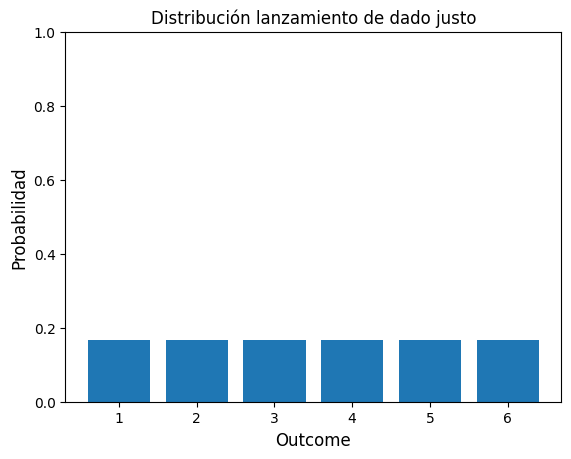

In [271]:
#probabilidades
probs = np.full((6), 1/6)

#opciones
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.ylabel('Probabilidad', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
plt.title('Distribución lanzamiento de dado justo', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

### Distribución de Poisson
Es una distribución de **probabilidad discreta** que describe el número de eventos que ocurren en un intervalo de tiempo o espacio fijo, siempre que estos eventos sucedan de manera independiente y a una tasa promedio constante. 

Se utiliza para modelar la ocurrencia de eventos raros o infrecuentes.

Por ejemplo, las compañías de seguros realizan análisis de riesgos (predecir el número de accidentes de tráfico en un período de tiempo predefinido) para decidir el precio del seguro de automóvil.

En la siguiente figura se muestra cómo variar el número esperado de eventos que pueden tener lugar en un período ($λ$) puede cambiar una Distribución de Poisson

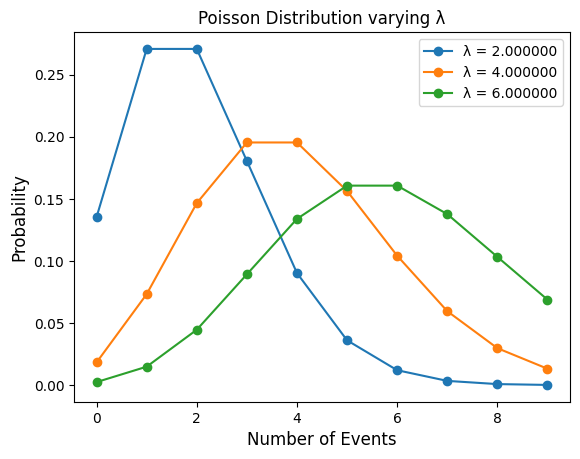

In [272]:
# n = number of events, lambd = expected number of events 
# which can take place in a period
for lambd in range(2, 8, 2):
    n = np.arange(0, 10)
    poisson = st.poisson.pmf(n, lambd)
    plt.plot(n, poisson, '-o', label="λ = {:f}".format(lambd))
    plt.xlabel('Number of Events', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()

Para determinar la probabilidad de observar k eventos en un intervalo se calcula usando la fórmula:

$P=\frac{λ^k·e^-λ}{k!}$
 
Donde:

- $λ$ es el número promedio de eventos por unidad de tiempo o espacio.
- $k$ es el número de eventos observados.
- $e$ es la constante de Euler (~2.718).

## Test estadísticos
---

Los **tests de hipótesis** son métodos estadísticos utilizados para evaluar si una afirmación sobre un conjunto de datos es razonable o no.

A través del análisis de los datos, se determina si hay suficiente evidencia para rechazar la hipótesis nula en favor de la alternativa, usando medidas como el valor p y un nivel de significancia predefinido (α).

### Usos
- Investigación clínica
- Pruebas A/B
- Selección de características en ML

### Pasos
1. **Definir la hipótesis nula y alternativa**. Se comienza con una hipótesis nula (H₀), que representa una afirmación de "no efecto" o "no diferencia", y una hipótesis alternativa (H₁), que sugiere lo contrario.
   

2. **Elegir la prueba estadística adecuada** según la naturaleza de los datos y la hipótesis planteada.

3. **Calcular el valor de (p value)**, que indicará la probabilidad de obtener resultados al menos tan extremos como los observados, asumiendo que la hipótesis nula es verdadera.

4. **Determinar la significancia estadística** comparando el valor p con el nivel de significancia (α), que típicamente se fija en 0.05.

### Hipótesis
La **hipótesis** es una suposición o afirmación que se hace con el objetivo de ser probada mediante investigación o experimentación.

Dependiendo de la dirección de la hipótesis alternativa, el test puede ser de:

- **Dos colas**: H₁ sugiere que el parámetro es diferente (ya sea mayor o menor) de un valor específico (H₁: μ ≠ μ₀). Este test es apropiado cuando solo interesa saber si el parámetro es distinto, sin importar la dirección del cambio.

- **Una cola izquierda**: H₁ sugiere que el parámetro es menor que un valor específico (H₁: μ < μ₀). Se usa cuando se quiere probar si el parámetro es significativamente menor que el valor de referencia.

- **Una cola derecha**: H₁ sugiere que el parámetro es mayor que un valor específico (H₁: μ > μ₀). Se usa cuando se quiere probar si el parámetro es significativamente mayor que el valor de referencia.

Para una prueba unilateral, la probabilidad tomada para significación estadística corresponde a un lado y puede ser hacia la derecha y hacia la izquierda.

> Cuando trabajas con hipótesis de una cola (ya sea derecha o izquierda), la evidencia de aumento o disminución siempre debe estar especificada en la hipótesis alternativa.

En Python, **no existe una función especial para las pruebas unilaterales**. Pero se puede calcular realizando una prueba bilateral y dividiendo el valor *p* entre 2.

**Ejemplo**  
Para vender todas las sandalias online antes de que termine la temporada, contrataste a desarrolladores web para crear una página web llamada Watermelon Life. Observando las estadísticas, notaste que cuanto más tiempo las personas pasaban en tu sitio web (cuantos más bloques veían), más a menudo compraban sandías. El promedio de bloques vistos fue de 4.867.

Los diseñadores insistieron en que cambies los primeros bloques para cumplir con las nuevas pautas, lo hiciste, pero la cantidad de pedidos no cambió. Pero probablemente los usuarios empezaron a realizar compras más rápidamente. Comprobemos si ese es el caso: si es así, los usuarios deberían decidir realizar compras después de ver solo los primeros bloques de la página web, por lo que la cantidad de bloques que ven **debería ser menor ahora**.

- La hipótesis nula sería: "*El número promedio de bloques vistos es igual a 4.867*"

- La hipótesis alternativa sería: "*El número promedio de bloques vistos es menor a 4.867*"

In [273]:
screens = pd.Series([4, 2, 4, 5, 5, 4, 2, 3, 3, 5, 2, 5, 2, 2, 2, 3, 3, 4, 8, 3, 4, 3, 5, 5, 4, 2, 5, 2, 3, 7, 5, 5, 6,  5, 3, 4, 3, 6, 3, 4, 4, 3, 5, 4, 4, 8, 4, 7, 4, 5, 5, 3, 4, 6, 7, 2, 3, 6, 5, 6, 4, 4, 3, 4, 6, 4, 4, 6, 2, 6, 5, 3, 3, 3, 4, 5, 3, 5, 5, 4, 3, 3, 3, 1, 5, 4, 3, 4, 6, 3, 1, 3, 2, 7, 3, 6, 6, 6, 5, 5])

prev_screens_value = 4.867 # número promedio de bloques vistos

alpha = 0.05  # nivel de significación

results = st.ttest_1samp(screens, prev_screens_value)

# prueba unilateral: el valor p se divide en dos
print('valor-p: ', results.pvalue / 2)

# prueba unilateral a la izquierda:
# rechaza la hipótesis solo si la media muestral es significativamente menor que el valor propuesto
if (results.pvalue / 2 < alpha) and (screens.mean() < prev_screens_value):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p:  1.3358596895543794e-06
Rechazamos la hipótesis nula


Es posible que se pueda usar el `(screens.mean() < prev_screens_value)` para determinar si el valor observado es menor que el predicho. Si hubieramos esperado que el valor observado fuera mayor solo cambia la orientación del signo `(screens.mean() > prev_screens_value)`. 

Esto no es forzoso ya que una vez que determinamos la significancia podemos contrastar mas medias y concluir. 


### Pruebas estadísticas
Existen diferentes tipos comunes de prueba estadísticas, entre ellas:

- T de student
- Z test
- Análisis de varianza (ANOVA)
- Chi cuadrada

#### T de student
##### Contraste promedio
Para probar si la media de la población es igual a x podemos utilizar la función `scipy.stats.ttest_1samp (array, popmean)`. 

Donde:
- `ttest` significa prueba t, 
- `1samp` significa que estamos trabajando con una muestra y comparándola con un valor dado.
- `array` es una matriz que contiene la muestra.
- `popmean` es la media propuesta que estamos probando.

**Ejemplo**  
Eres el dueño de Scooters Get You There, una cadena de alquiler de patinetes con 20 locales en el centro de la ciudad, cada uno con hasta 50 patinetes. Quieres verificar si el promedio de patinetes disponibles en cada estación durante el día es de 30, como indican los estudios de un grupo urbano llamado 'Squirrel'.

Cada hora, cada estación reporta el número de patinetes disponibles. Has recopilado datos de 13:00 a 16:00 durante los últimos 30 días.

Prueba si el promedio de patinetes disponibles es significativamente diferente de 30, usando un nivel de significancia del 5%.

La hipotesis nula sería: "*El promedio de patines disponibles es 30*"

In [274]:
## Set de datos recopilados
scooters = pd.Series([15, 31, 10, 21, 21, 32, 30, 25, 21,
28, 25, 32, 38, 18, 33, 24, 26, 40, 24, 37, 20, 36, 28, 38,
24, 35, 33, 21, 29, 26, 13, 25, 34, 38, 23, 37, 31, 28, 32,
24, 25, 13, 38, 34, 48, 19, 20, 22, 38, 28, 31, 18, 21, 24,
31, 21, 28, 29, 33, 40, 26, 33, 33,  6, 27, 24, 17, 28,  7,
33, 25, 25, 29, 19, 30, 29, 22, 15, 28, 36, 25, 36, 25, 29,
33, 19, 32, 32, 28, 26, 18, 48, 15, 27, 27, 27,  0, 28, 39,
27, 25, 39, 28, 22, 33, 30, 35, 19, 20, 18, 31, 44, 20, 18,
17, 28, 17, 44, 40, 33,])

## Establecer valores
promedio_esperado = 30 
alpha = 0.05

## Prueba estadística t-student
results = st.ttest_1samp(scooters, promedio_esperado)# realiza la prueba t

print('valor p: ', round(float(results.pvalue),5))# extrae el valor p de los resultados de la prueba)

# comparar el valor p con el umbral
if (results.pvalue < alpha):
    print("Aceptamos la hipótesis alternativa")
else:
    print("Aceptamos la hipótesis nula")

print("El promedio de patines real es:", scooters.mean())

valor p:  0.00034
Aceptamos la hipótesis alternativa
El promedio de patines real es: 27.175


La prueba nos indica que el valor de *p* es 0.00034. Por lo tanto, aceptamos la hipótesis alternativa y concluimos en promedio no hay 30 patines por estación. Inspeccionando los datos, notamos que el promedio de bicicletas por estación es 27, siendo estadísticamente más bajo. 

##### Contraste medias de 2 poblaciones
A veces necesitas comparar las medias de dos poblaciones estadísticas diferentes.

Para probar tu hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas, aplica la función `scipy.stats.ttest_ind(array1, array2, equal_var)`.

Donde: 
- `ttest` significa prueba t, 
- `ind` significa que estamos trabajando muestras independientes.
- `array1` y `array2` son matrices que contienen las muestras.
- `equal_var` especifica si las varianzas de las poblaciones deben considerarse iguales (`True`) o no(`False`). Si tenemos indicions de que las varianzas pueden ser diferentes se utiliza `False`.

**Ejemplo**
La cantidad gastada en compras realizadas en un mes por visitantes provenientes de dos canales diferentes. Tienes una muestra aleatoria de 30 compras de cada canal.

In [275]:
sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015, 
            2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785, 
            3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686, 
            1838, 3352]

sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007, 
            509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066, 
            3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255, 
            1740, 2596]

## Asignación de significancia
alpha = 0.05  

## Prueba estadística t student muestras independientes
results = st.ttest_ind(sample_1, sample_2) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if (results.pvalue < alpha):
    print("Aceptamos la hipótesis alternativa")
else:
    print("Aceptamos la hipótesis nula")

valor p:  0.1912450522572209
Aceptamos la hipótesis nula


El valor p nos dice que no es posible concluir que existe una diferencia significativa entre los importes promedio gastados entre los dos canales.

##### Contraste medias de 2 muestras dependientes
Las muestras dependientes o  emparejadas, significa que medimos una variable dos veces para cada observación, antes y después de los cambios.

Para probar la hipótesis de que las medias de dos poblaciones son iguales para muestras dependientes (emparejadas) usamos esta función: `scipy.stats.ttest_rel(array1,array2)`.

Donde: 

- `ttest` significa prueba t, 
- `rel` significa que estamos trabajando muestras dependientes.
- `array1` y `array2` son matrices que contienen las muestras.

**Ejemplo**
El peso del paquete en gramos, antes de cambiar el método de cálculo del precio de envío, y el peso después (para los mismos clientes habituales). 

La hipóteis nula sería: *El peso del paquete no cambio con el método de cálculo de precio*

In [276]:
## Pesos antes y después
before = [157, 114, 152, 355, 155, 513, 299, 268, 164, 320, 
                    192, 262, 506, 240, 364, 179, 246, 427, 187, 431, 
                    320, 193, 313, 347, 312, 92, 177, 225, 242, 312]

after = [282, 220, 162, 226, 296, 479, 248, 322, 298, 418, 
                 552, 246, 251, 404, 368, 484, 358, 264, 359, 410, 
                 382, 350, 406, 416, 438, 364, 283, 314, 420, 218]

## Asignación de significancia
alpha = 0.05  

## Prueba estadística t de student para muestras pareadas
results = st.ttest_rel(before, after)

print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print("Aceptamos la hipótesis alternativa")
else:
    print("Aceptamos la hipótesis nula")

valor p:  0.005825972457958989
Aceptamos la hipótesis alternativa


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que ha habido un cambio en los pesos de los paquetes.